In [1]:
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [2]:
# Function for 2-D and 3-D Plot
def lorenz_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,6.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' )
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )

    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'lorenz_ode_components.png' )
    plt.show ( )
    return

def lorenz_ode_plot_3d (x, y, z):
    fig = plt.figure (figsize = (8.5,8.5))
    ax = fig.add_subplot(projection='3d')
    ax.plot ( x, y, z, linewidth = 0.5, color = 'orangered' )
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' ,fontsize=12)
    ax.set_ylabel ( '<--- y(t) --->' ,fontsize=12)
    ax.set_zlabel ( '<--- z(t) --->' ,rotation=90,fontsize=12)
    plt.savefig ( 'lorenz_ode_3d.pdf', format='pdf' )
    plt.show ( )
    return

In [3]:
#Compute the time-derivative of a Lorenz system
def x_dot(x1, y1, z1):
    x1_dot=sigma*(y1 - x1)
    return x1_dot

def y_dot(x1, y1, z1, y2, z2):
    y1_dot=rho*x1 - y1 - x1*z1
    y2_dot=rho*x1 - y2 - x1*z2
    return(y1_dot,y2_dot)

def z_dot(x1, y1, z1, y2, z2):
    z1_dot=-1*(beta*z1) + x1*y1
    z2_dot=-1*(beta*z2) + x1*y2
    return(z1_dot,z2_dot)

In [4]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,b2,c2,n):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)


    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    y2[0] = b2
    z2[0] = c2
    t[0] = 0
    dt = 0.01

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):

        t[k+1] = t[k] + dt

        k1 = x_dot(x1[k], y1[k], z1[k])
        l1,v1 = y_dot(x1[k], y1[k], z1[k], y2[k], z2[k])
        m1,w1 = z_dot(x1[k], y1[k], z1[k], y2[k], z2[k])

        k2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt))
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))

        k3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt))
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))

        k4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt))
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (y2[k] + v3*dt),
         (z2[k] + w3*dt))
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (y2[k] + v3*dt),
         (z2[k] + w3*dt))

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,y2,z2, t


In [253]:
import numpy as np
import matplotlib.pyplot as plt
def generate_A_t(t):
    # Slow amplitude variation (normal operating condition)
    rng = np.random.default_rng()   
    fm = rng.uniform(0.1, 1.0)        # modulation frequency (Hz)
    m  = rng.uniform(0.0, 0.05)       # modulation depth (≤ 5%)
    phi = rng.uniform(0, 2*np.pi)

    A_t = 1.0 + m * np.sin(2*np.pi*fm*t + phi)
    return A_t
    
def generate_pq_signal(
    disturbance="normal",
    fs=5000,
    T=0.2,
    f0=50,
    A=1.0,
    t_window = [0.06,0.14],
    delay_ms = 35,
    noise_std = 0.0,
    rng = None
):
    """
    disturbance options:
    'normal', 'sag', 'swell', 'interruption', 'harmonics'
    """
    if rng is None:
        rng = np.random.default_rng()   

    t = np.arange(0, T, 1/fs)

    # Reference (ideal sine wave) → Master signal
    A_t = generate_A_t(t)
    x_ref = A_t * np.sin(2*np.pi*f0*t)

    # ---- PURE TIME DELAY (no padding) ----
    A_t = generate_A_t(t)
    tau = delay_ms * 1e-3
    y = A_t * np.sin(2*np.pi*f0*(t - tau))

    # Disturbance window
    t_start,t_end = t_window
    idx = np.where((t >= t_start) & (t <= t_end))[0]

    # ---------------- Disturbances ----------------
    if disturbance == "normal":
        pass

    elif disturbance == "sag":
        # 10–30% drop → 0.7–0.9 p.u.
        mag = rng.uniform(0.7, 0.9)
        y[idx] = mag * y[idx]

    elif disturbance == "swell":
        # 10–30% rise → 1.1–1.3 p.u.
        mag = rng.uniform(1.1, 1.3)
        y[idx] = mag * y[idx]

    elif disturbance == "interruption":
        # <10% p.u.
        mag = rng.uniform(0.0, 0.1)
        y[idx] = mag * y[idx]

    elif disturbance == "harmonics":
        # Random harmonic combinations
        h3_amp = rng.uniform(0.05, 0.25)
        h5_amp = rng.uniform(0.03, 0.15)
        h3 = h3_amp * np.sin(2*np.pi*3*f0*(t - tau))
        h5 = h5_amp * np.sin(2*np.pi*5*f0*(t - tau))
        y = y + h3 + h5

    else:
        raise ValueError("Unknown disturbance type")
        
    # --- ADDITIVE NOISE ---
    if noise_std > 0:
        noise = rng.normal(0.0, noise_std, size=len(y))
        y = y + noise

    return t, x_ref, y


In [6]:
def error_rhs(e1, e2, e3, x1, x2, x3, y1, y2, y3, alpha, beta, gamma):
    de1 = alpha * (e2 - e1)
    de2 = beta*e1 - e2 - x1*x3 + y1*y3
    de3 = -gamma*e3 + x1*x2 - y1*y2
    return de1, de2, de3


In [7]:
def rk4_error_step(e1, e2, e3,
                   x1, x2, x3, y1, y2, y3,
                   dt, alpha, beta, gamma):

    k1 = error_rhs(e1, e2, e3,
                   x1, x2, x3, y1, y2, y3,
                   alpha, beta, gamma)

    k2 = error_rhs(e1 + 0.5*dt*k1[0],
                   e2 + 0.5*dt*k1[1],
                   e3 + 0.5*dt*k1[2],
                   x1, x2, x3, y1, y2, y3,
                   alpha, beta, gamma)

    k3 = error_rhs(e1 + 0.5*dt*k2[0],
                   e2 + 0.5*dt*k2[1],
                   e3 + 0.5*dt*k2[2],
                   x1, x2, x3, y1, y2, y3,
                   alpha, beta, gamma)

    k4 = error_rhs(e1 + dt*k3[0],
                   e2 + dt*k3[1],
                   e3 + dt*k3[2],
                   x1, x2, x3, y1, y2, y3,
                   alpha, beta, gamma)

    e1n = e1 + dt*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
    e2n = e2 + dt*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
    e3n = e3 + dt*(k1[2] + 2*k2[2] + 2*k3[2] + k4[2]) / 6

    return e1n, e2n, e3n


In [8]:
def embed_signal(sig, i):
    """
    Time-delay embedding:
    (s[i], s[i+1], s[i+2])
    """
    return sig[i], sig[i+1], sig[i+2]


In [9]:
def simulate_cs_error_from_embedding(
    x_ref, y_meas,
    alpha=10, beta=28, gamma=8/3,
    dt=0.01, steps=1
):
    """
    Implements Eq. (5) directly:
    - embed reference and measured signals
    - form error states
    - integrate error dynamics
    """
    print(alpha,beta,gamma)
    E1, E2, E3 = [], [], []

    for i in range(len(x_ref) - 2):

        # --- embedding ---
        x1, x2, x3 = embed_signal(x_ref, i)
        y1, y2, y3 = embed_signal(y_meas, i)

        # --- initial error ---
        e1 = x1 - y1
        e2 = x2 - y2
        e3 = x3 - y3

        # --- integrate error system ---
        for _ in range(steps):
            e1, e2, e3 = rk4_error_step(
                e1, e2, e3,
                x1, x2, x3,
                y1, y2, y3,
                dt, alpha, beta, gamma
            )

        E1.append(e1)
        E2.append(e2)
        E3.append(e3)

    return np.array(E1), np.array(E2), np.array(E3)


In [10]:
def compute_error_states(xm, ym, zm, xs, ys, zs):
    e1 = xs - xm
    e2 = ys - ym
    e3 = zs - zm
    return e1, e2, e3


dt: 0.0002


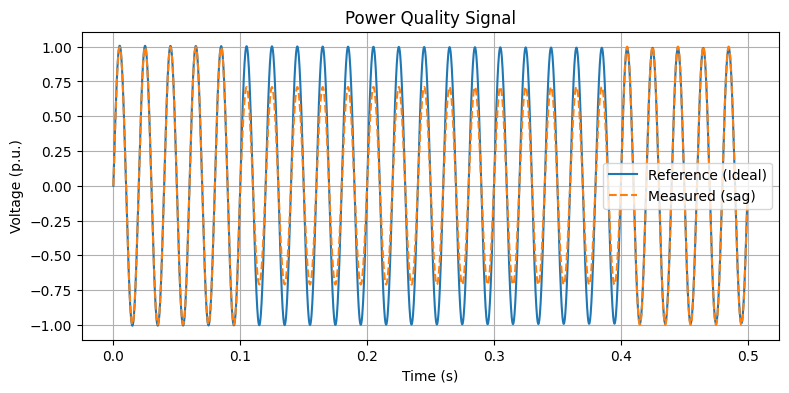

In [575]:
# Select disturbance type
disturbance_type = "sag"
# Options: normal, sag, swell, interruption, harmonics

t, x_ref, y_meas = generate_pq_signal(disturbance=disturbance_type,T = 0.5, t_window = [0.1,0.4], delay_ms = 0, noise_std = 0.0)
dt = t[1] - t[0]
print('dt:',dt)
# Plot
plt.figure(figsize=(9,4))
plt.plot(t, x_ref, label="Reference (Ideal)")
plt.plot(t, y_meas, '--', label=f"Measured ({disturbance_type})")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (p.u.)")
plt.title("Power Quality Signal")
plt.grid(True)
plt.legend()
plt.show()


In [576]:
alpha= 7000
beta = 3000
gamma = 7000
steps = 1
dt = 0.005

(e1, e2,e3) = simulate_cs_error_from_embedding(
    x_ref, y_meas,
    alpha, beta, gamma,
    dt, steps
)

7000 3000 7000


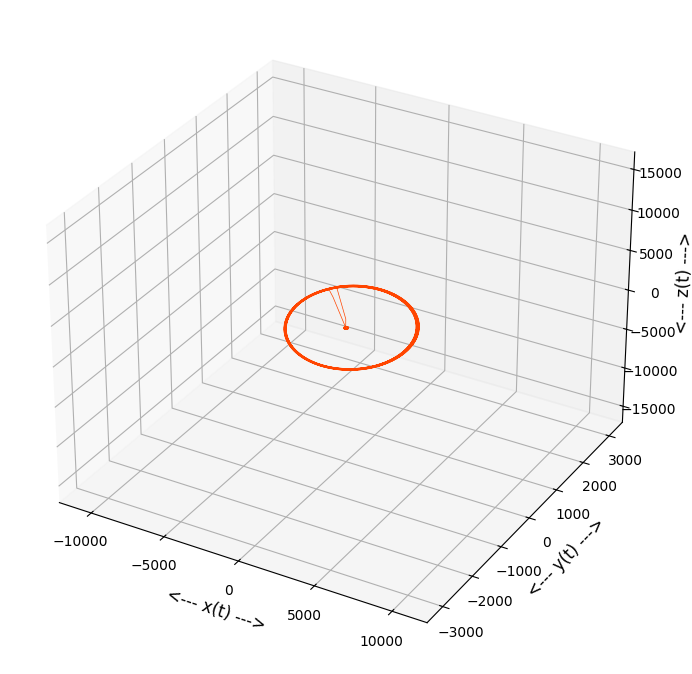

In [577]:
lorenz_ode_plot_3d(e1,e2,e3)

In [578]:
import numpy as np

def cs_detector_E(x_ref, y_meas, b=2.0):
    """
    Compute CS-based detector sequence E_i (Eq. 9)

    x_ref: reference signal x[i]
    y_meas: measured/unknown signal y[i]
    b: scaling factor (paper parameter)

    Returns:
        E: array of length n-2
    """
    n = len(x_ref)
    if len(y_meas) != n:
        raise ValueError("x_ref and y_meas must have same length")
    if n < 3:
        raise ValueError("Need at least 3 samples")

    # embeddings
    x_i   = x_ref[:-2]
    x_ip1 = x_ref[1:-1]
    x_ip2 = x_ref[2:]

    y_i   = y_meas[:-2]
    y_ip1 = y_meas[1:-1]
    y_ip2 = y_meas[2:]

    # error states
    e1 = x_i   - y_i
    e2 = x_ip1 - y_ip1

    # Eq. (9)
    E = b*e1 - e2 - (x_i*x_ip2 - y_i*y_ip2)

    return E


In [579]:

E = cs_detector_E(x_ref, y_meas, b=10/9)

print("E length:", len(E), len(e1))


E length: 2498 2498


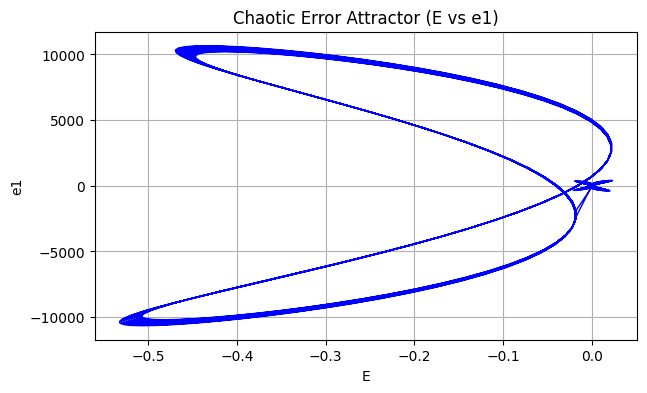

In [580]:
plt.figure(figsize=(7,4))
#plt.scatter(e1, E, s=5, c='blue', alpha=0.5)
plt.plot(E,e1, color='blue', linewidth=1) 
plt.xlabel('E')
plt.ylabel('e1')
plt.title('Chaotic Error Attractor (E vs e1)')
plt.grid(True)
plt.show()

In [581]:
import numpy as np

def extract_ck_from_E(e1, E):
    """
    Extract c1,c2,c3 features from the CS detector output E_i
    using the paper's idea:
    - use upper half (E>0)
    - split by e1 into 3 intervals
    """

    e1 = np.asarray(e1)
    E  = np.asarray(E)

    # upper half
    mask = (E > 0)
    e1u = e1[mask]
    Eu  = E[mask]

    if len(Eu) < 10:
        return np.nan, np.nan, np.nan  # too few points

    # split e1 into 3 equal bins (quantiles = robust)
    q1, q2 = np.quantile(e1u, [1/3, 2/3])

    # regions
    r1 = Eu[e1u <= q1]
    r2 = Eu[(e1u > q1) & (e1u <= q2)]
    r3 = Eu[e1u > q2]

    c1 = np.mean(r1) if len(r1) else 0.0
    c2 = np.mean(r2) if len(r2) else 0.0
    c3 = np.mean(r3) if len(r3) else 0.0

    return c1, c2, c3



In [582]:
def extract_ck_energy(e1, E):
    e1 = np.asarray(e1)
    E  = np.abs(np.asarray(E))   # energy-like

    # partition by e1 quantiles
    q1, q2 = np.quantile(e1, [1/3, 2/3])

    c1 = E[e1 <= q1].mean()
    c2 = E[(e1 > q1) & (e1 <= q2)].mean()
    c3 = E[e1 > q2].mean()

    return c1, c2, c3

In [583]:
(c1,c2,c3) = extract_ck_energy(e1,E)
print(c1,c2,c3)

0.24060729014152407 0.007878399646041848 0.20436009766378077


In [584]:
def classify_pq(c1, c2, c3):
    C = np.array([c1, c2, c3])
    D = C.max()
    R = (C.max() - C.min()) / C.max()

    # NORMAL
    if D < 0.11:
        return "Normal"

    # INTERRUPTION
    if D > 0.6:
        return "Interruption"

    # HARMONICS (balanced energy)
    if R < 0.25:
        return "Harmonics"

    # SAG vs SWELL (energy asymmetry)
    if c1 > c3:
        return "Sag"
    else:
        return "Swell"


In [585]:
classify_pq(c1,c2,c3)

'Sag'